In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU,Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
dt = pd.read_csv('Uniqlo.csv')

In [3]:
dt

,Month,Week,Item,Qty
0,2,8,4-239989-333-00,2584
1,3,12,4-228876-332-00,36671
2,3,13,4-228870-332-00,17144
3,4,14,4-228870-332-00,60345
4,4,14,4-224243-332-00,7620
...,...,...,...,...
4751,12,52,4-237311-333-00,210
4752,12,52,4-243028-333-00,1172
4753,12,52,4-243028-333-00,2546
4754,10,40,25K-240166-333-00,26000


In [4]:
# One-hot encode gender and interests
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(dt[['Item', 'Month']])

# Chuẩn hóa age và height
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dt[['Week']])

iq_scaler = StandardScaler()
scaled_iq = iq_scaler.fit_transform(dt[['Qty']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
data = dt['Qty']
train_size = int(0.9 * len(data))
test_size = len(data) - train_size

In [6]:

# Kết hợp tất cả các biến độc lập
X = np.concatenate([scaled_features, encoded_features], axis=1)
y = scaled_iq.ravel()
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Chuyển đổi dữ liệu thành dạng phù hợp cho RNN (thêm chiều thời gian)
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [7]:
# Xây dựng mô hình RNN
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=150, batch_size=256, validation_data=(X_test, y_test))

# Dự báo
predictions = model.predict(X_test)


Epoch 1/150
17/17 [==============================] - 9s 78ms/step - loss: 1.0143 - val_loss: 0.7672
Epoch 2/150
17/17 [==============================] - 0s 11ms/step - loss: 0.9831 - val_loss: 0.7404
Epoch 3/150
17/17 [==============================] - 0s 15ms/step - loss: 0.9503 - val_loss: 0.7097
Epoch 4/150
17/17 [==============================] - 0s 15ms/step - loss: 0.9135 - val_loss: 0.6751
Epoch 5/150
17/17 [==============================] - 0s 12ms/step - loss: 0.8724 - val_loss: 0.6379
Epoch 6/150
17/17 [==============================] - 0s 9ms/step - loss: 0.8297 - val_loss: 0.6028
Epoch 7/150
17/17 [==============================] - 0s 15ms/step - loss: 0.7878 - val_loss: 0.5752
Epoch 8/150
17/17 [==============================] - 0s 9ms/step - loss: 0.7530 - val_loss: 0.5535
Epoch 9/150
17/17 [==============================] - 0s 12ms/step - loss: 0.7237 - val_loss: 0.5393
Epoch 10/150
17/17 [==============================] - 0s 11ms/step - loss: 0.7043 - val_loss: 0.5341
E

In [8]:
y_pred = np.round(iq_scaler.inverse_transform(predictions).flatten()).astype(int)
y_pred[:5]

array([ 4844, 22483,  1553, 16001, 37905])

In [9]:


train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]


In [10]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - test_data.values)**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(test_data.values - y_pred)/np.abs(test_data.values))*100

print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - test_data.values))
print('Testing MAE:', test_mae)

Testing RMSE: 112085.90561835023
Testing MAPE: 11405.294766017265
Testing MAE: 47095.48319327731


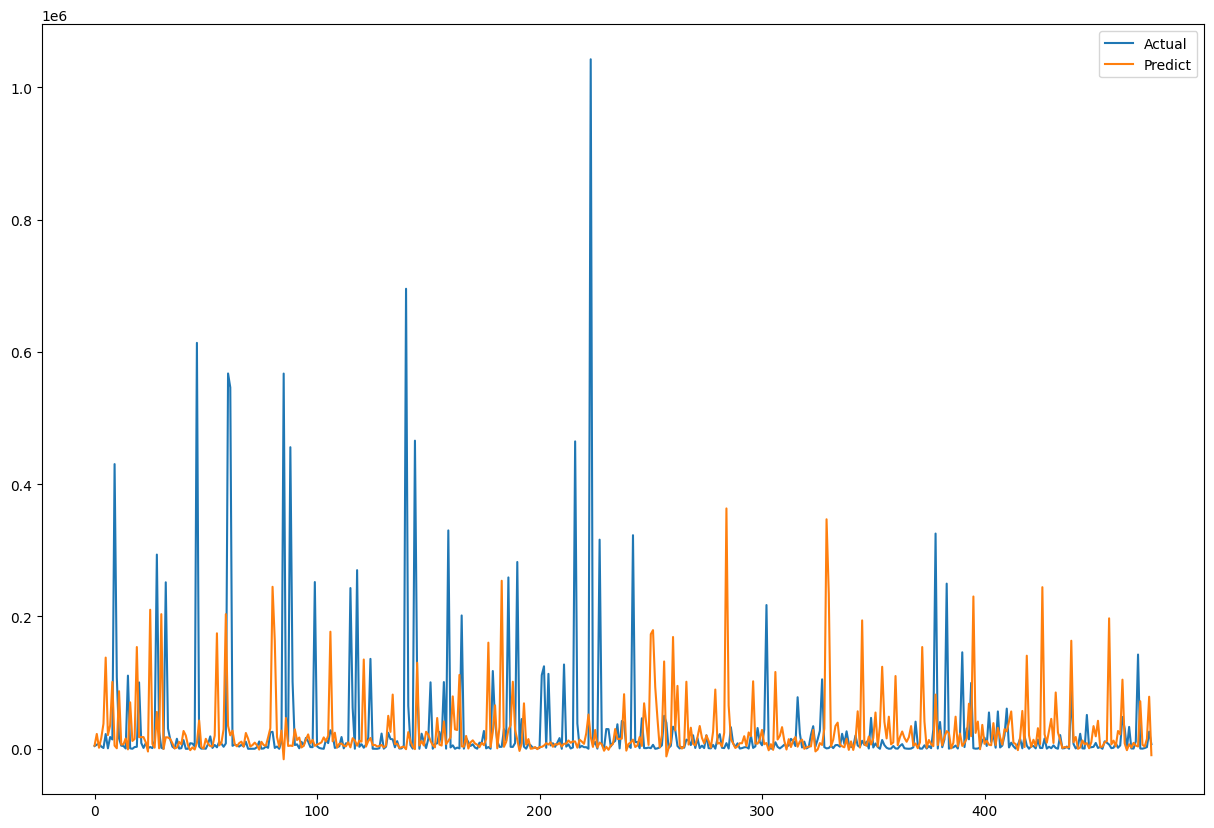

In [11]:
plt.figure(figsize=(15, 10))
test_data_index = pd.RangeIndex(start=0, stop=test_size, step=1)
plt.plot(test_data_index,(test_data.values))
train_data_index = pd.RangeIndex(start=0, stop=len(y_pred), step=1)
plt.plot(y_pred)
plt.legend(['Actual', 'Predict'])
plt.show()


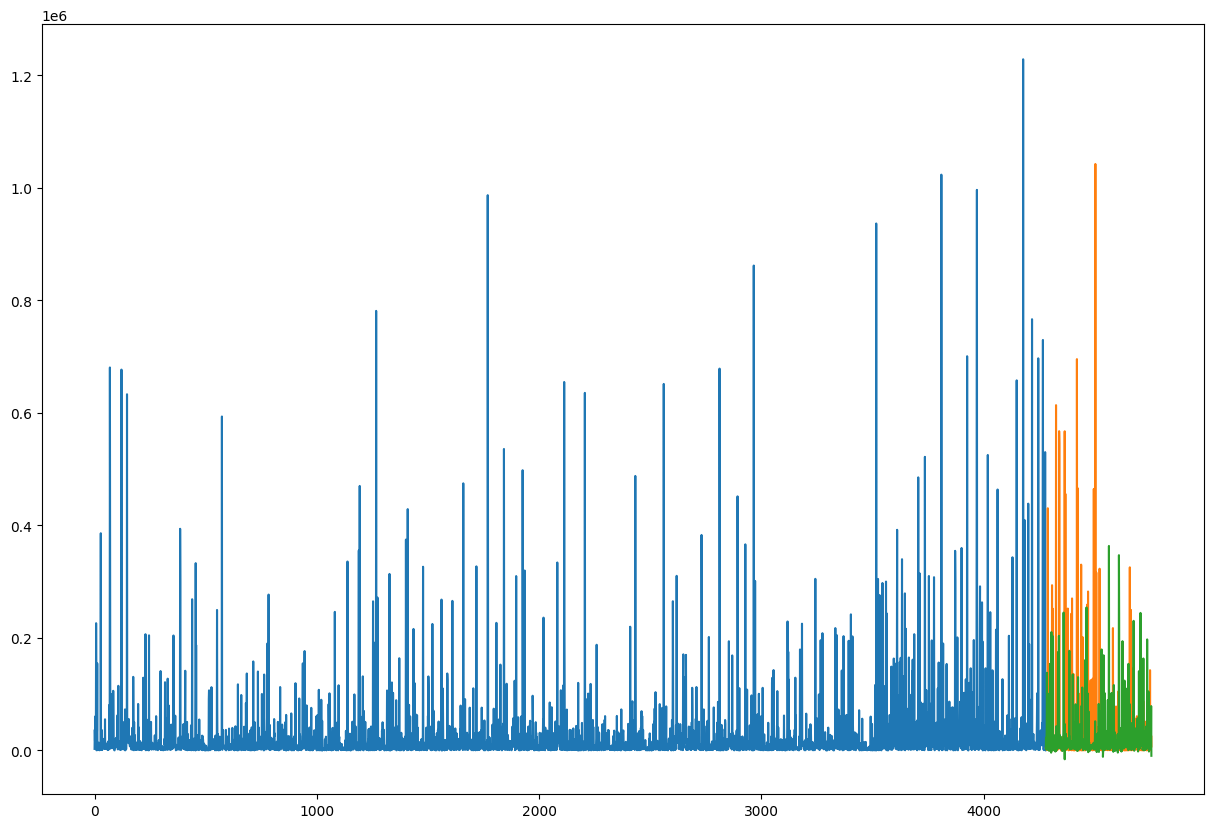

In [12]:
plt.figure(figsize=(15, 10))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot((train_data.values))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(test_data.values))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred)
